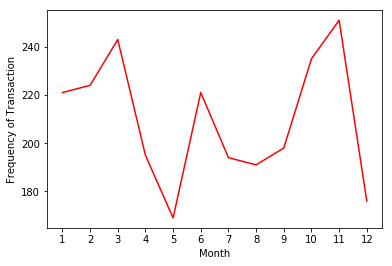

In [102]:
%matplotlib inline

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('anonymized.csv') 

df['Month'] = df['Date'].apply(lambda x: datetime.strptime(x,'%d%b%Y').month)
# df['Year'] = df['Date'].apply(lambda x: datetime.strptime(x,'%d%b%Y').year)

df = df.drop(['Date'],axis=1)
df = df.drop(['Amount'],axis=1)
df['Frequency'] = df.groupby('Month')['Month'].transform('count')
df = df.drop_duplicates()
df['Month'] = sorted(df['Month'])

x = df['Month']
y = df['Frequency']
plt.plot(x,y,'r')
plt.xlabel('Month')
plt.xticks(np.arange(1, 13, 1.0))
plt.ylabel('Frequency of Transaction')
plt.show()

In [106]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

[3 0 3 3 3 3 1 0 0 1 2 3 0 0 1 0 2 3 0 0 0 2 0 3 0 0 3 1 1 1 3 0 1 1 1 1 1
 3 0 0 0 1 0 1 0 0 3 2 1 1 0 0 2 0 1 0 0 1 1 1 1 1 0 1 1 1 2 0 2 1 0 0 1 3
 0 3 1 1 1 0 2 0 1 2 1 1 2 2 0 2 1 1 1 2 1 1 3 1 0 0 0 0 2 2 1 1 3 1 0 3 1
 0 3 3 0 0 1 0 0 3 0 0 0 1 1 1 3 1 0 2 0 1 2 3 1 0 0 1 1 3 2 0 1 2 0 0 1 1
 1 1 1 0 1 0 2 0 1 1 1 0 0 1 0 0 1 2 0 0 3 0 0 1 0 3 3 1 0 3 3 1 3 0 2 0 0
 0 3 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 3 2 2 0 1 1 0 2 2 2 0 1 2 1 0 0 0 0 1 1
 0 0 3 3 0 3 0 3 2 0 2 1 3 2 0 1 3 0 0 3 2 1 1 2 0 1 1 1 2 1 1 0 3 0 2 0 1
 0 1 3 0 3 3 0 0 0 0 0 0 1 1 1 1 2 3 3 2 1 0 0 3 1 0 1 0 1 1 1 1 3 3 1 3 2
 0 1 1 2 2 2 0 0 3 2 0 1 0 0 0 1 3 3 0 1 2 1 2 0 2 2 1 2 2 1 2 0 0 2 3 1 1
 2 1 1 2 0 1 0 1 1 2 1 1 1 1 0 3 0 3 0 0 0 0 0 0 3 2 0 3 3 1 3 0 1 1 1 3 0
 0 1 2 0 1 1 2 3 2 0 0 3 0 3 0 1 2 0 1 0 1 1 0 3 0 3 2 1 3 2 2 1 0 0 1 3 0
 2 0 0 3 0 0 0 3 1 1 0 0 1 1 0 1 1 3 3 1 0 3 1 0 2 0 0 1 0 2 2 0 1 1 1 3 1
 0 1 0 0 1 1 0 0 1 0 0 2 1 0 1 3 1 1 1 0 1 3 1 0 0 0 0 2 2 0 0 3 1 1 1 3 1
 3 1 2 0 1 0 3 3 0 0 3 0 

In [107]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.random.rand(n_people, n_clusters)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

# each row = each person
# each column = probability of each cluster of each person

[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
[[0.5960727  0.03934831 0.28678035 0.07779864]
 [0.35223981 0.32646888 0.23235999 0.08893131]
 [0.07474763 0.05970621 0.28472027 0.58082589]
 ...
 [0.2137493  0.35150843 0.09318962 0.34155265]
 [0.24378197 0.42167747 0.21691489 0.11762567]
 [0.29557688 0.21827784 0.3754964  0.11064889]]
